In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Checking Null Values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Frequency Distribution

In [6]:
for i in df.columns:
  print(df[i].value_counts())

2      1
572    1
578    1
582    1
584    1
      ..
328    1
330    1
332    1
333    1
890    1
Name: PassengerId, Length: 183, dtype: int64
1    123
0     60
Name: Survived, dtype: int64
1    158
2     15
3     10
Name: Pclass, dtype: int64
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     1
Appleton, Mrs. Edward Dale (Charlotte Lamson)           1
Silvey, Mrs. William Baird (Alice Munger)               1
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
Ross, Mr. John Hugo                                     1
                                                       ..
Ball, Mrs. (Ada E Hall)                                 1
Hippach, Miss. Jean Gertrude                            1
Partner, Mr. Austen                                     1
Graham, Mr. George Edward                               1
Behr, Mr. Karl Howell                                   1
Name: Name, Length: 183, dtype: int64
male      95
female    88
Name: Sex, dtype: int64
36.0    11
24.0     9
19.0   

Normalization

In [7]:
df_max_scaled = df.copy()

In [8]:
column = 'Pclass'
df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()

In [9]:
# display(df_max_scaled)
df_max_scaled[column]

1      0.333333
3      0.333333
6      0.333333
10     1.000000
11     0.333333
         ...   
871    0.333333
872    0.333333
879    0.333333
887    0.333333
889    0.333333
Name: Pclass, Length: 183, dtype: float64

Outlier Detection


<Axes: >

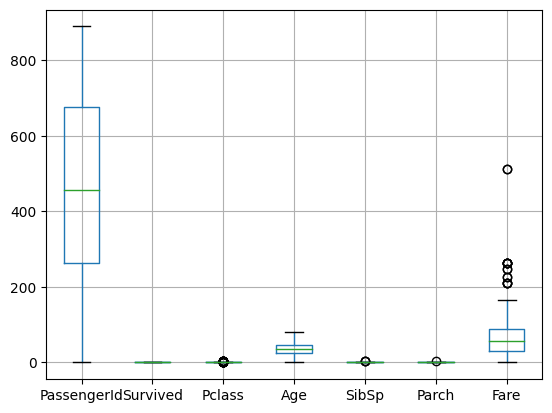

In [10]:
df.boxplot()

In [12]:
df['Pclass'].unique()

array([1, 3, 2])

<ipython-input-13-f1a6ddd2595a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

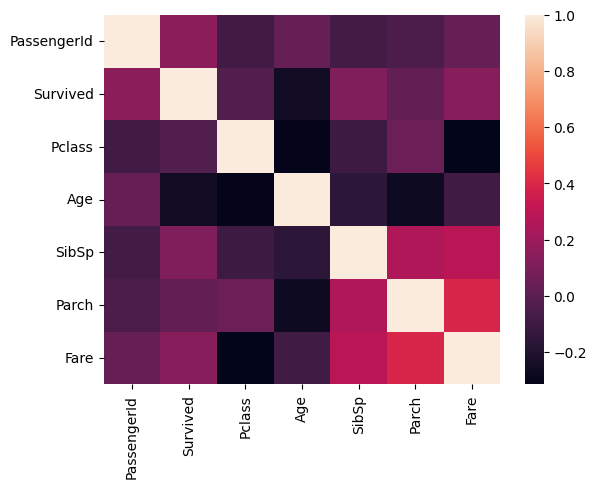

In [13]:
import seaborn as sns
sns.heatmap(df.corr())


In [18]:
titanic=df[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
1,1,female,1,0,C,1
3,1,female,1,0,S,1
6,1,male,0,0,S,0
10,3,female,1,1,S,1
11,1,female,0,0,S,1


In [19]:
ct=pd.crosstab(titanic['Survived'], titanic['Pclass'], margins=True)
ct

Pclass,1,2,3,All
Survived,,,,
0,52,3,5,60
1,106,12,5,123
All,158,15,10,183


In [20]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=2.45855047854276, pvalue=0.8730773802669791, dof=6, expected_freq=array([[ 51.80327869,   4.91803279,   3.27868852,  60.        ],
       [106.19672131,  10.08196721,   6.72131148, 123.        ],
       [158.        ,  15.        ,  10.        , 183.        ]]))